In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [28]:
raw= pd.read_csv('diabetes.csv')
raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## This is a classification problem

In [ ]:
# Note:

In [4]:
raw.info()
# Checking for invalid datatypes e.g. object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*Non found*

In [5]:
raw.isna().sum()
# Checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Non found*

C:\Users\Dvain\AppData\Local\Temp\ipykernel_16648\965428143.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i//2, i%2])
C:\Users\Dvain\AppData\Local\Temp\ipykernel_16648\965428143.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i//2, i%2])
C:\Users

IndexError: index 4 is out of bounds for axis 0 with size 4

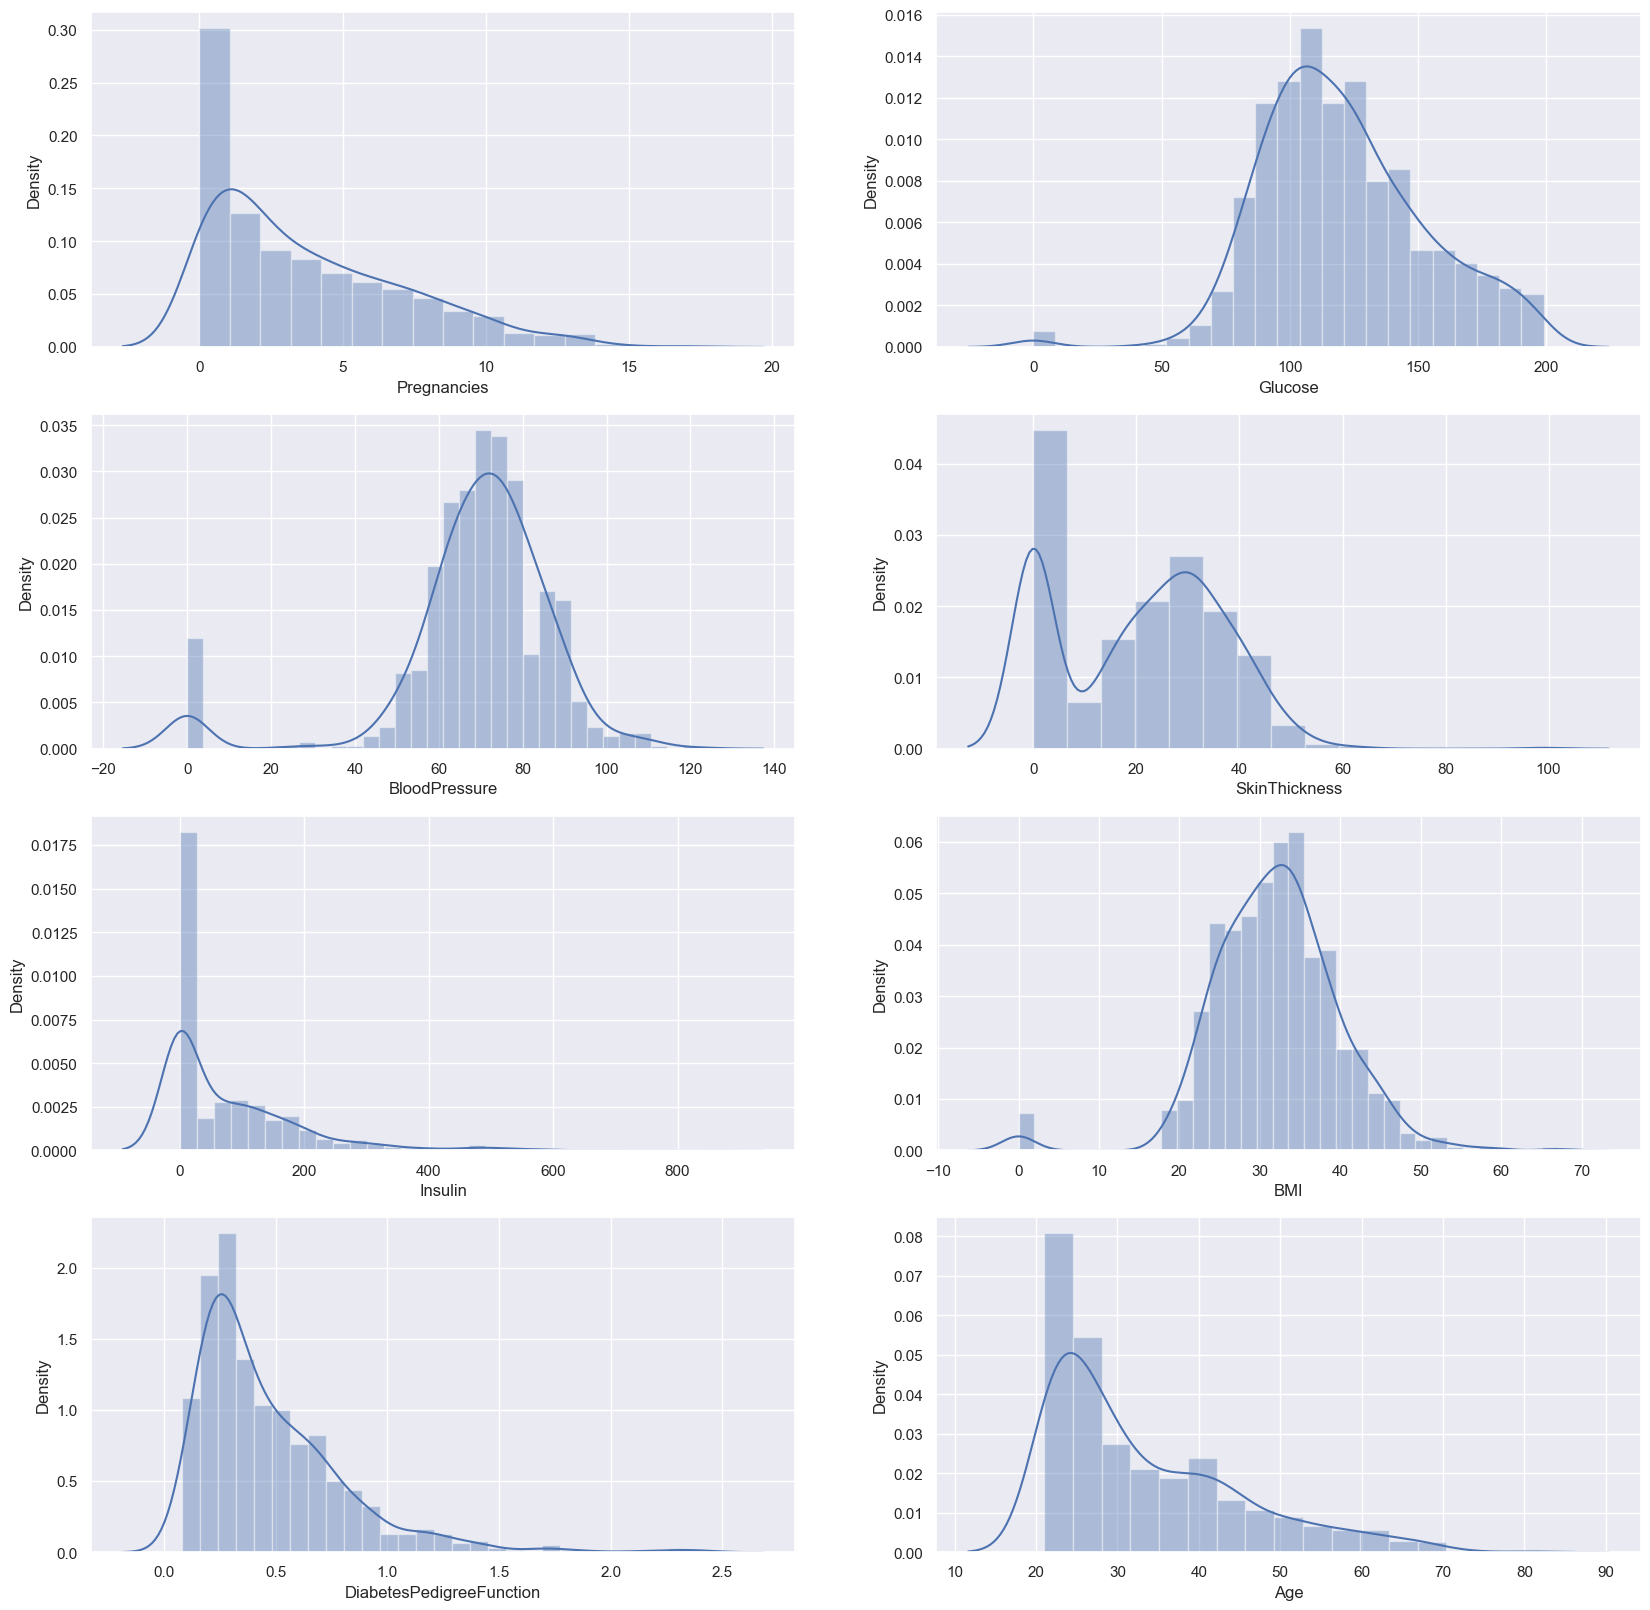

In [6]:
# Checking the distribution of the data
def plotAllRawDistribution(df):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
    for i, column in enumerate(df.columns):
        sns.distplot(df[column], ax=axes[i//2, i%2])
    plt.show()
plotAllRawDistribution(raw)

SO we see a few weird things. Allots of zero values are there for features where it is practically impossible to have 0 values
We need to handle them first. lets look at each of them.    

In [37]:
raw['BMI']=raw['BMI'].apply(lambda x: np.nan if x==0 else x)
raw['BMI'].isna().sum()


11

In [39]:
raw['BMI'].fillna(raw['BMI'].mean(), inplace=True)

<Axes: title={'center': 'BMI distribution'}, ylabel='Frequency'>

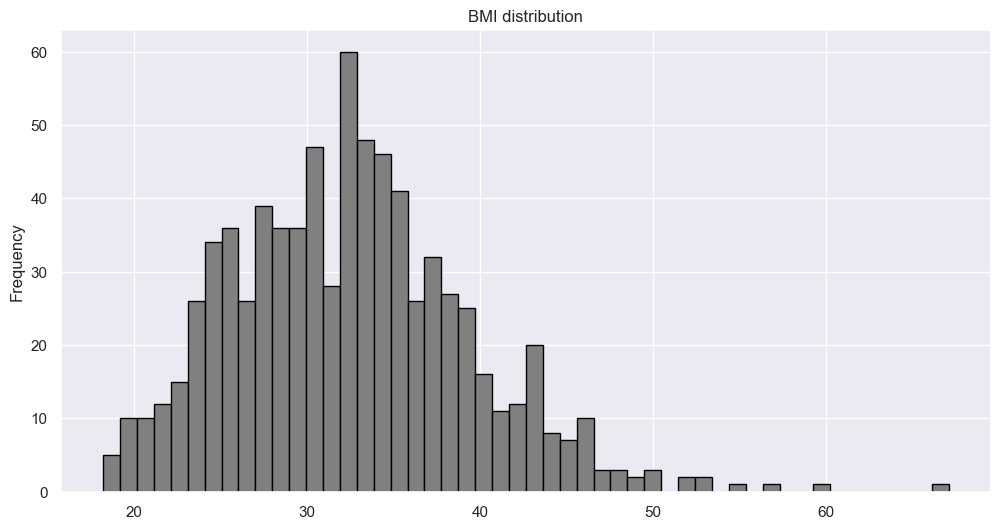

In [40]:
raw['BMI'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black', title='BMI distribution')

In [7]:
raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\Dvain\AppData\Local\Temp\ipykernel_16648\965428143.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i//2, i%2])
C:\Users\Dvain\AppData\Local\Temp\ipykernel_16648\965428143.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i//2, i%2])
C:\Users

IndexError: index 4 is out of bounds for axis 0 with size 4

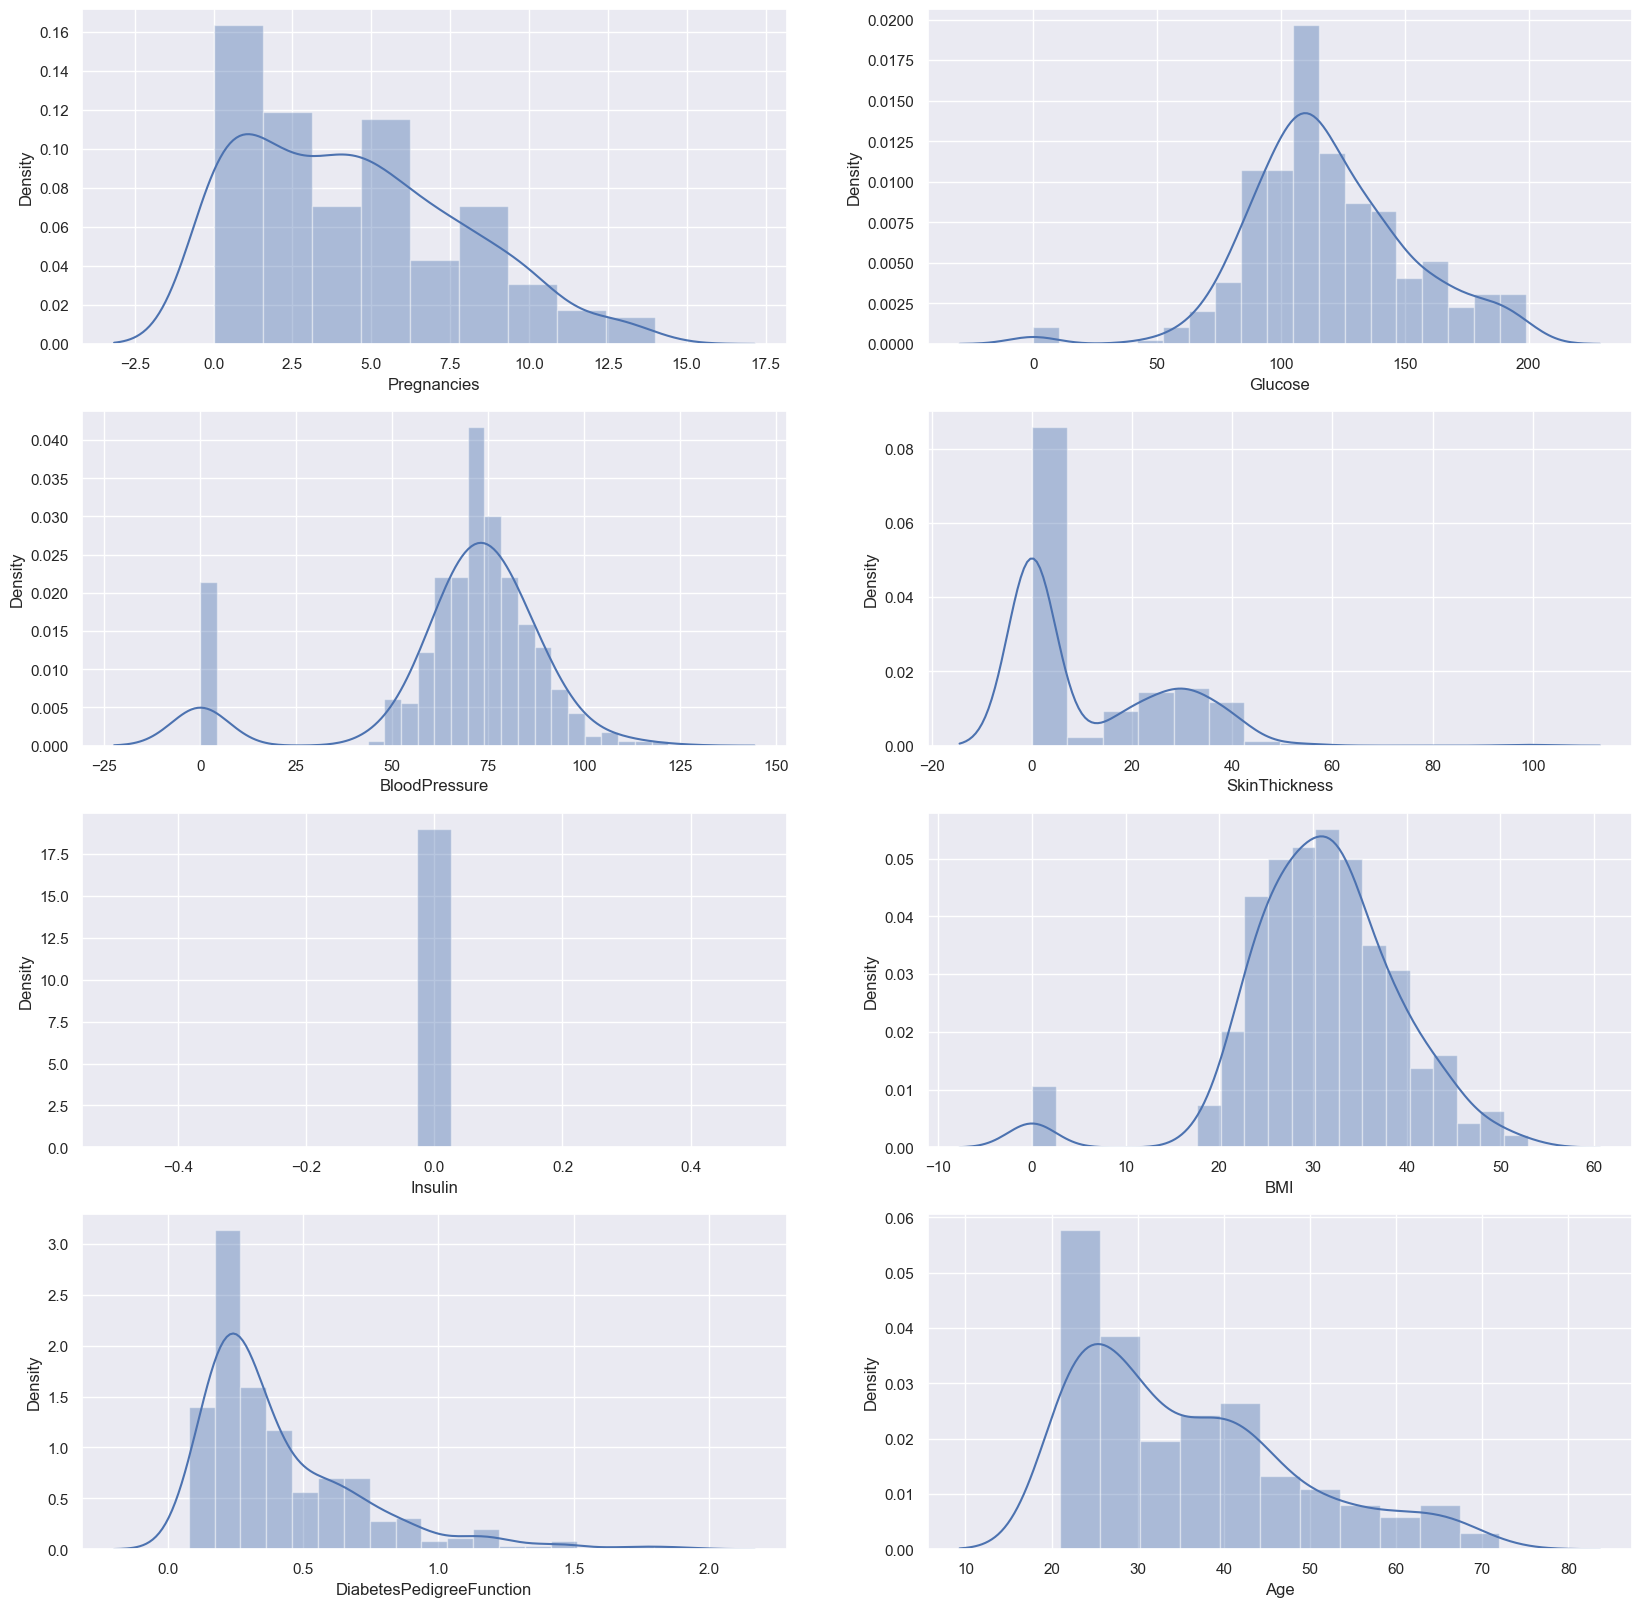

In [24]:
insulin0=raw[raw['Insulin']<=3]
plotAllRawDistribution(insulin0)